## Lab | Data Cleaning Bonus Challenge


The objective of the lab are:
* To know the iris dataset
* Review cleaning concepts


In [149]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [116]:
#Import the .csv file as dataframe

iris = pd.read_csv('./iris-data.csv')

In [117]:
#Check for null values: 

iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [118]:
#Check the data type:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [119]:
#For numerical data:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/Users/GNavarroFernandez/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


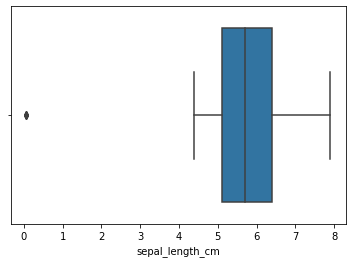

In [120]:
#General visualization of each column

#Both histograms and boxplots can be used to detect outliers

sns.boxplot(iris['sepal_length_cm'])

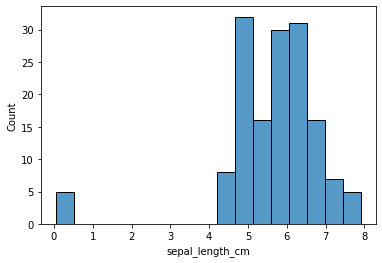

In [121]:
sns.histplot(iris['sepal_length_cm'])

/Users/GNavarroFernandez/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


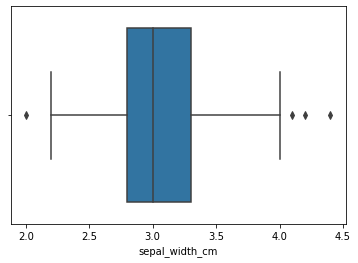

In [122]:
sns.boxplot(iris['sepal_width_cm'])

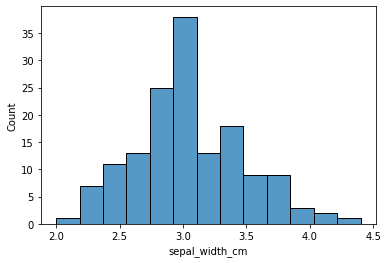

In [123]:
sns.histplot(iris['sepal_width_cm'])

/Users/GNavarroFernandez/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


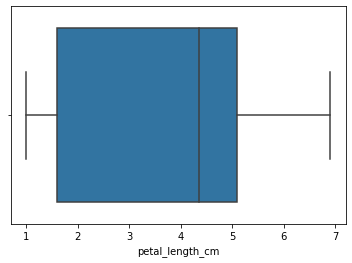

In [124]:
sns.boxplot(iris['petal_length_cm'])

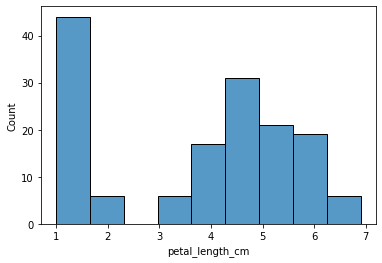

In [125]:
sns.histplot(iris['petal_length_cm'])

/Users/GNavarroFernandez/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


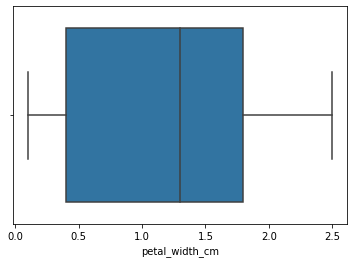

In [126]:
sns.boxplot(iris['petal_width_cm'])

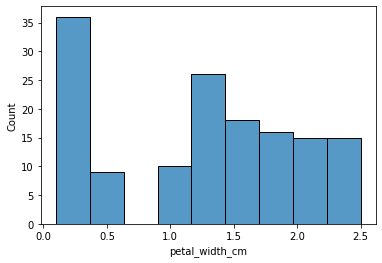

In [127]:
sns.histplot(iris['petal_width_cm'])

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


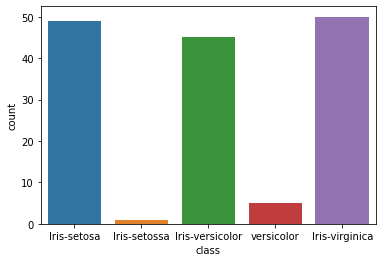

In [128]:
print(iris['class'].value_counts())
print(sns.countplot(data=iris, x='class'))

#### Conclusions of first view:

* There are 5 missing values on the column petal_width_cm
* There are some outliers in sepal_length_cm columns 
* Some columns seem to follow a non-normal distribution
* The categorical column seems to be unbalanced due to an error on encoding: Iris-setossa probably means Iris-setosa and versicolor probably means Iris-versicolor.

**Next steps:**
* Correct class column
* Look where the missing values are (in which class)
* Repeat the descriptive statistics and plots by classes
* Imputing missing values
* Categorical encoding
* Check for normal distribution of the data
* Scaling

In [129]:
#Iris-setossa is probably a typo and versicolor probably is the same than Iris-versicolor
change = {'Iris-setossa':'Iris-setosa', 'versicolor':'Iris-versicolor'}
def change_class(x):
    if x in change.keys():
        return change[x]
    if x not in change.keys():
        return x


In [130]:
change.keys()

dict_keys(['Iris-setossa', 'versicolor'])

In [131]:
iris['new_class'] = iris['class'].apply(change_class)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: new_class, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


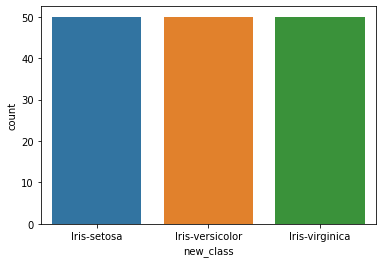

In [132]:
print(iris['new_class'].value_counts())
print(sns.countplot(data=iris, x='new_class'))

In [133]:
setosa = iris[iris['new_class'] == 'Iris-setosa']
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,45.000000
mean,5.034000,3.418000,1.464000,0.251111
std,0.350865,0.381024,0.173511,0.110005
min,4.400000,2.300000,1.000000,0.100000
25%,4.800000,3.125000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.675000,1.575000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [134]:
versicolor = iris[iris['new_class'] == 'Iris-versicolor']
versicolor.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.353880,2.772000,4.260000,1.326000
std,1.850515,0.313662,0.469911,0.197753
min,0.055000,2.000000,3.000000,1.000000
25%,5.500000,2.525000,4.000000,1.200000
50%,5.800000,2.800000,4.350000,1.300000
75%,6.275000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [135]:
virginica = iris[iris['new_class'] == 'Iris-virginica']
virginica.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,6.546000,2.974000,5.552000,2.034000
std,0.630261,0.322497,0.551895,0.276723
min,4.900000,2.200000,4.500000,1.400000
25%,6.200000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.550000,2.000000
75%,6.900000,3.175000,5.875000,2.300000
max,7.900000,3.800000,6.900000,2.500000


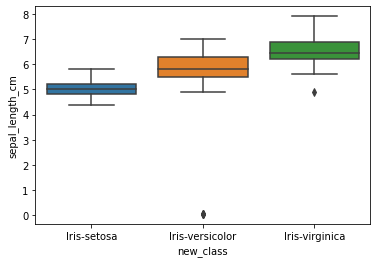

In [136]:
sns.boxplot(data=iris, x='new_class', y='sepal_length_cm')

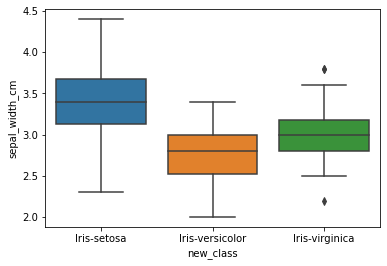

In [137]:
sns.boxplot(data=iris, x='new_class', y='sepal_width_cm')

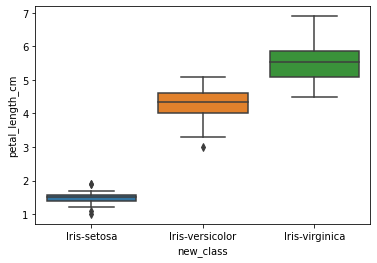

In [138]:
sns.boxplot(data=iris, x='new_class', y='petal_length_cm')

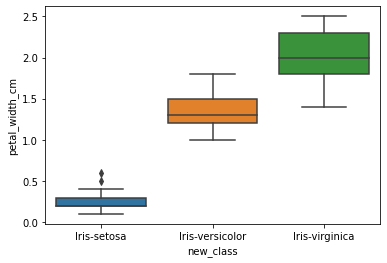

In [139]:
sns.boxplot(data=iris, x='new_class', y='petal_width_cm')

In [140]:
def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df

In [141]:
missing_percentage(iris)

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.000000
sepal_width_cm,sepal_width_cm,0.000000
petal_length_cm,petal_length_cm,0.000000
petal_width_cm,petal_width_cm,3.333333
class,class,0.000000
new_class,new_class,0.000000


In [142]:
nulls = iris[iris['petal_width_cm'].isnull()]
nulls

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,new_class
7,5.0,3.4,1.5,NaN,Iris-setosa,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa,Iris-setosa


In [143]:
# All nulls are in 'Iris-setosa' class. There are only 5 nulls (<4% of the total data) so I'm going to imput them using 
# the mean. 

imputer = SimpleImputer(strategy="mean")
iris['petal_width_cm'] = imputer.fit_transform(iris[['petal_width_cm']])


In [144]:
missing_percentage(iris)

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.0
sepal_width_cm,sepal_width_cm,0.0
petal_length_cm,petal_length_cm,0.0
petal_width_cm,petal_width_cm,0.0
class,class,0.0
new_class,new_class,0.0


In [145]:
#Now, label encoding of new_class feature
iris=pd.get_dummies(iris, columns=['new_class'], drop_first=True)
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,new_class_Iris-versicolor,new_class_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,1
146,6.3,2.5,5.0,2.3,Iris-virginica,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,0,1
148,6.2,3.4,5.4,2.3,Iris-virginica,0,1


In [146]:
#Now, I check if the data follows normal distribution in order to select the best scaling method

def normal_dist(df):
    numerical = df.select_dtypes(float)
    for i in numerical:
        test = st.normaltest(df[i])
        if test[1] < 0.05:
            message = 'Non-normal distribution'
        else:
            message = 'Normal distribution'
        print(i, 'Statistic: ', test[0], 'p-value', test[1], message)

In [147]:
normal_dist(iris)

sepal_length_cm Statistic:  96.76504756046815 p-value 9.721581058994196e-22 Non-normal distribution
sepal_width_cm Statistic:  3.5931200385486206 p-value 0.1658684923629814 Normal distribution
petal_length_cm Statistic:  221.33178660723647 p-value 8.677871269019617e-49 Non-normal distribution
petal_width_cm Statistic:  67.1288383407107 p-value 2.649463653360844e-15 Non-normal distribution


**Given the results of the normal distribution test, I should use the Normalization or the Robust scaling method**

**Only the sepal_width_cm feature shows normal distribution and this is possible to use the Standardization method**


**Because of the presence of some outliers, the selected scaling method is RobustScaler() because Normalization method is sensitive to outliers**



In [156]:
columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
scaler = RobustScaler()
iris_scaled = scaler.fit_transform(iris[columns])
iris_scaled = pd.DataFrame(iris_scaled, columns=columns)

In [157]:
iris_scaled

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,-0.461538,1.0,-0.842857,-0.785714
1,-0.615385,0.0,-0.842857,-0.785714
2,-0.769231,0.4,-0.871429,-0.785714
3,-0.846154,0.2,-0.814286,-0.785714
4,-0.538462,1.2,-0.842857,-0.785714
...,...,...,...,...
145,0.769231,0.0,0.242857,0.714286
146,0.461538,-1.0,0.185714,0.714286
147,0.615385,0.0,0.242857,0.500000
148,0.384615,0.8,0.300000,0.714286


In [158]:
iris_scaled['new_class_Iris-versicolor'] = iris['new_class_Iris-versicolor']
iris_scaled['new_class_Iris-virginica'] = iris['new_class_Iris-virginica']

In [159]:
iris_scaled

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,new_class_Iris-versicolor,new_class_Iris-virginica
0,-0.461538,1.0,-0.842857,-0.785714,0,0
1,-0.615385,0.0,-0.842857,-0.785714,0,0
2,-0.769231,0.4,-0.871429,-0.785714,0,0
3,-0.846154,0.2,-0.814286,-0.785714,0,0
4,-0.538462,1.2,-0.842857,-0.785714,0,0
...,...,...,...,...,...,...
145,0.769231,0.0,0.242857,0.714286,0,1
146,0.461538,-1.0,0.185714,0.714286,0,1
147,0.615385,0.0,0.242857,0.500000,0,1
148,0.384615,0.8,0.300000,0.714286,0,1


In [160]:
iris_scaled.to_csv('./final_iris.csv')